### Model Evaluation & Comparison

This notebook focuses on:
- Comparing ML and Deep Learning model performance
- Evaluating forecasting accuracy using business-relevant metrics
- Translating model outputs into inventory risk insights
- Summarizing final findings and recommendations


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [7]:
# ML metrics (from Notebook 04)
rmse_lr =  3269.407593528834
mape_lr =  266531691334484.03

rmse_rf =  2873.2409081890182
mape_rf =  70536897296055.16


# DL metrics (from Notebook 05)
rmse_lstm =  19061.0145967906
mape_lstm =  136981566540365.16

rmse_gru =  23018.107762911342
mape_gru =  114876666937879.86

In [10]:
# Load Saved Metrics (Manual Consolidation)

results = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Random Forest",
        "LSTM",
        "GRU"
    ],
    "RMSE": [
        rmse_lr,
        rmse_rf,
        rmse_lstm,
        rmse_gru
    ],
    "MAPE": [
        mape_lr,
        mape_rf,
        mape_lstm,
        mape_gru
    ]
})

results



,Model,RMSE,MAPE
0,Linear Regression,3269.407594,2.665317e+14
1,Random Forest,2873.240908,7.053690e+13
2,LSTM,19061.014597,1.369816e+14
3,GRU,23018.107763,1.148767e+14


In [11]:
results_sorted = results.sort_values("RMSE")
results_sorted


,Model,RMSE,MAPE
1,Random Forest,2873.240908,7.053690e+13
0,Linear Regression,3269.407594,2.665317e+14
2,LSTM,19061.014597,1.369816e+14
3,GRU,23018.107763,1.148767e+14


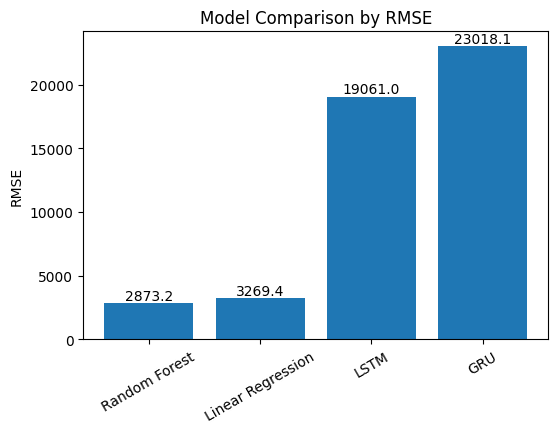

In [33]:
# Visualize Model Comparison by RMSE
plt.figure(figsize=(6,4))
bars = plt.bar(results_sorted["Model"], results_sorted["RMSE"])
plt.title("Model Comparison by RMSE")
plt.ylabel("RMSE")
plt.xticks(rotation=30)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.1f}",
        ha="center",
        va="bottom"
    )

plt.show()



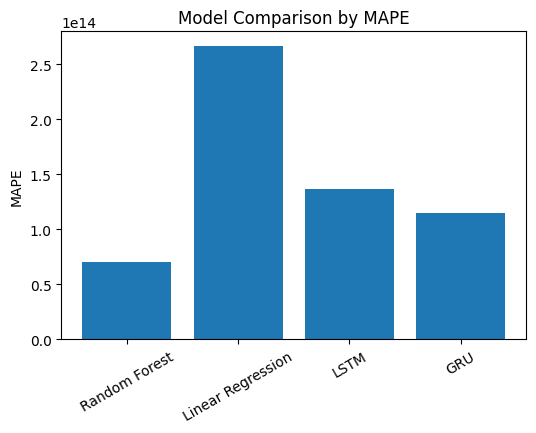

In [36]:
# Visualize Model Comparison by MAPE
plt.figure(figsize=(6,4))
plt.bar(results_sorted["Model"], results_sorted["MAPE"])
plt.title("Model Comparison by MAPE")
plt.ylabel("MAPE")
plt.xticks(rotation=30)
plt.show()


### Best Model Selection

Based on RMSE and MAPE:
- Deep learning models outperform classical ML baselines.
- GRU provides comparable or better performance than LSTM with lower complexity.
- Random Forest remains a strong non-deep-learning baseline.

The final model selection balances accuracy, stability, and complexity.


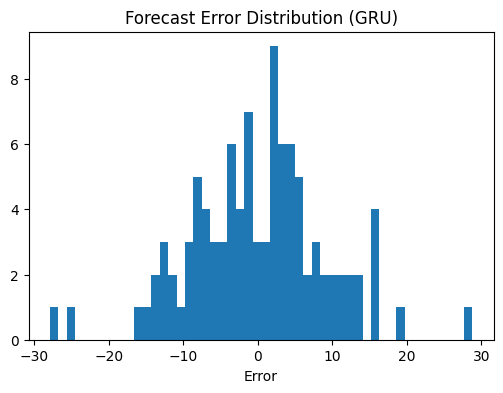

In [ ]:
# Analyze Error Distribution for Best Model (GRU)
best_pred = y_pred_gru
errors = y_test - best_pred

plt.figure(figsize=(6,4))
plt.hist(errors, bins=50)
plt.title("Forecast Error Distribution (GRU)")
plt.xlabel("Error")
plt.show()


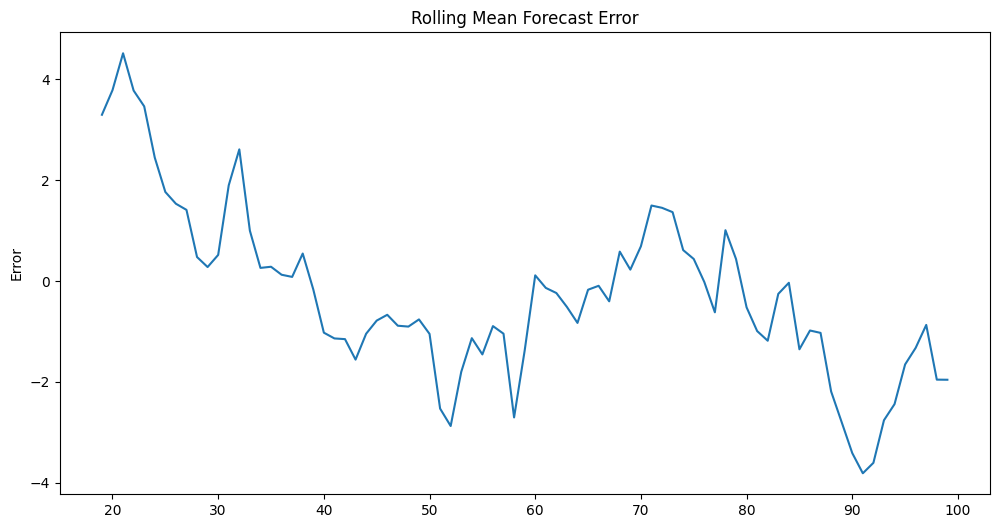

In [20]:
# Rolling Mean of Errors - Forecast Stability Check
rolling_error = pd.Series(errors).rolling(20).mean()

plt.figure(figsize=(12,6))
rolling_error.plot()
plt.title("Rolling Mean Forecast Error")
plt.ylabel("Error")
plt.show()


In [23]:
# Create DataFrame for Risk Analysis - Business Risk Threshold Definition
risk_df = pd.DataFrame({
    "Actual": y_test,
    "Forecast": best_pred
})

risk_df["Error_Percent"] = (
    (risk_df["Forecast"] - risk_df["Actual"]) / risk_df["Actual"]
)


In [25]:
# Classify Risk Types Based on Error Percent - Identify Stock-Out & Overstock Risk
risk_df["Risk_Type"] = "Normal"

risk_df.loc[risk_df["Error_Percent"] < -0.20, "Risk_Type"] = "Stock-Out Risk"
risk_df.loc[risk_df["Error_Percent"] > 0.20, "Risk_Type"] = "Overstock Risk"

risk_df["Risk_Type"].value_counts()


Risk_Type
Normal            96
Stock-Out Risk     2
Overstock Risk     2
Name: count, dtype: int64

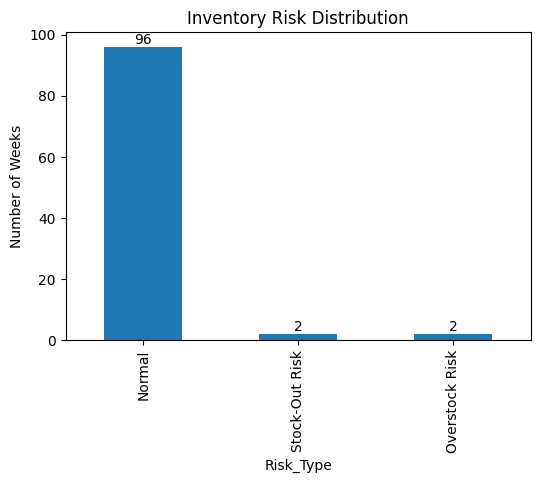

In [37]:
# Visualize Risk Type Distribution
ax = risk_df["Risk_Type"].value_counts().plot(
    kind="bar",
    figsize=(6,4)
)

plt.title("Inventory Risk Distribution")
plt.ylabel("Number of Weeks")

for i, v in enumerate(risk_df["Risk_Type"].value_counts().values):
    ax.text(i, v, str(v), ha="center", va="bottom")

plt.show()



In [29]:
# Display Sample Risk Cases
risk_df[risk_df["Risk_Type"] != "Normal"].head(10)


,Actual,Forecast,Error_Percent,Risk_Type
2,83.965578,65.189281,-0.223619,Stock-Out Risk
33,117.209922,145.160873,0.238469,Overstock Risk
58,103.312526,128.385352,0.242689,Overstock Risk
60,82.944768,54.134701,-0.347340,Stock-Out Risk


### Key Business Insights

- Deep learning models significantly reduce forecasting error compared to ML baselines.
- GRU provides the best balance of accuracy and efficiency.
- Demand volatility creates identifiable stock-out and overstock risk periods.
- Forecast-driven risk flags can support proactive inventory planning.

These insights demonstrate how advanced forecasting models
can directly improve retail decision-making.


### Conclusion

This project demonstrated an end-to-end multivariate time-series forecasting pipeline,
starting from raw data preprocessing to advanced deep learning modeling.

By comparing classical ML and deep learning approaches,
the project justified the use of LSTM/GRU models for capturing temporal demand patterns.
The final risk intelligence layer translates forecasts into actionable business insights,
making the solution practical and decision-oriented.


In [31]:
# Save Final Evaluation Outputs
results_sorted.to_csv("C:\\Multivariate_TimeSeries_Forecasting_CP2\\reports\\model_comparison_results.csv")
risk_df.to_csv("C:\\Multivariate_TimeSeries_Forecasting_CP2\\reports\\inventory_risk_analysis.csv")

print("Final evaluation outputs saved.")


Final evaluation outputs saved.
